Importing Libraries

In [1]:
import pandas as pd # for data manipulation and analysis
import numpy as np # linear algebra

# For visualization 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("whitegrid")

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# Generating random values
import random as rd 

# For regex search
import re

#Importing libraries ML models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

#Importing dataset splitting library
from sklearn.model_selection import train_test_split

#Import Joblib
import joblib

#Encoders
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

#SMOTE
from imblearn.over_sampling import SMOTE

Exploratory Data analysis

In [2]:
#Read Dataset file 
df = pd.read_csv('Dataset/Point_variant_factorIX.csv')

In [3]:
df.sample(10)

,Variant ID,Case ID,Type,Effect,c.DNA,HGVS/Amino acid,Legacy/Amino Acid,Domain,Location in gene,Variant,Protein Change,FIX:C %,FIX:Ag %,Type I/II,Inhibitors,Severity,Comments,Reference,Reporting Centre
1586,334,1102,Point,Missense,571.0,191.0,145.0,Linker,Exon 6,c.571C>T,p.(Arg191Cys),4,-,-,NaN,Moderate,-,Centre B36 (unpublished),NaN
1783,352,1256,Point,Missense,676.0,226.0,180.0,Act-Peptide,Exon 6,c.676C>T,p.(Arg226Trp),<1,-,-,NaN,Severe,-,Centre B39 (unpublished),NaN
2324,466,4603,Point,Nonsense,880.0,294.0,248.0,Serine Protease,Exon 8,c.880C>T,p.(Arg294*),<1,NaN,NaN,NO,Severe,NaN,Johnsen et al (2017),United States
2005,1024,3354,Point,Splice,723.0,NaN,NaN,-,Intron 6,c.723+3A>T,NaN,-,-,-,NaN,NaN,-,Centre B39 (unpublished),NaN
305,68,3560,Point,Missense,128.0,43.0,-4.0,Pro-Peptide,Exon 2,c.128G>A,p.(Arg43Gln),-,-,-,NO,Moderate,-,Yu et al (2012),China
282,65,184,Point,Missense,127.0,43.0,-4.0,Pro-Peptide,Exon 2,c.127C>T,p.(Arg43Trp),-,-,-,NaN,NaN,-,Ljung et al (2001),Sweden
554,120,415,Point,Missense,206.0,69.0,23.0,Gla,Exon 2,c.206G>A,p.(Cys69Tyr),<1,19,II,NaN,Severe,-,Winship & Dragon (1991),United Kingdom
3950,763,2759,Point,Missense,1318.0,440.0,394.0,Serine Protease,Exon 8,c.1318A>G,p.(Lys440Glu),1 to 5,33,-,NaN,Moderate,-,Centre B38 (unpublished),NaN
1837,353,1283,Point,Missense,677.0,226.0,180.0,Act-Peptide,Exon 6,c.677G>A,p.(Arg226Gln),<1,-,-,NaN,Severe,-,Centre B39 (unpublished),NaN
2385,466,1634,Point,Nonsense,880.0,294.0,248.0,Serine Protease,Exon 8,c.880C>T,p.(Arg294*),<1,<1,-,NaN,Severe,-,Bottema et al (1993),United States


In [4]:
df.shape

(4151, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4151 entries, 0 to 4150
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Variant ID         4151 non-null   int64  
 1   Case ID            4151 non-null   int64  
 2   Type               4151 non-null   object 
 3   Effect             4021 non-null   object 
 4   c.DNA              4123 non-null   float64
 5   HGVS/Amino acid    3779 non-null   float64
 6   Legacy/Amino Acid  3779 non-null   float64
 7   Domain             4107 non-null   object 
 8   Location in gene   4151 non-null   object 
 9   Variant            4151 non-null   object 
 10  Protein Change     3779 non-null   object 
 11  FIX:C %            4126 non-null   object 
 12  FIX:Ag %           3184 non-null   object 
 13  Type I/II          3177 non-null   object 
 14  Inhibitors         1128 non-null   object 
 15  Severity           3628 non-null   object 
 16  Comments           3168 

In [6]:
df.describe(include='all')

,Variant ID,Case ID,Type,Effect,c.DNA,HGVS/Amino acid,Legacy/Amino Acid,Domain,Location in gene,Variant,Protein Change,FIX:C %,FIX:Ag %,Type I/II,Inhibitors,Severity,Comments,Reference,Reporting Centre
count,4151.000000,4151.000000,4151,4021,4123.000000,3779.000000,3779.000000,4107,4151,4151,3779,4126,3184,3177,1128,3628,3168,4151,3093
unique,NaN,NaN,1,4,NaN,NaN,NaN,10,19,884,726,172,161,3,2,5,17,232,27
top,NaN,NaN,Point,Missense,NaN,NaN,NaN,Serine Protease,Exon 8,c.1025C>T,p.(Thr342Met),<1,-,-,NO,Severe,-,Johnsen et al (2017),United States
freq,NaN,NaN,4151,3141,NaN,NaN,NaN,2221,1884,322,322,1402,2278,2522,1084,1600,3116,926,1481
mean,539.451457,2348.372199,NaN,NaN,716.831433,252.781424,206.710241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3420.359875,1412.336282,NaN,NaN,402.430668,129.241618,129.359652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,-822.000000,3.000000,-44.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,252.500000,1125.500000,NaN,NaN,316.000000,128.000000,82.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,469.000000,2249.000000,NaN,NaN,781.000000,279.000000,233.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,649.000000,3681.500000,NaN,NaN,1042.500000,357.000000,311.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


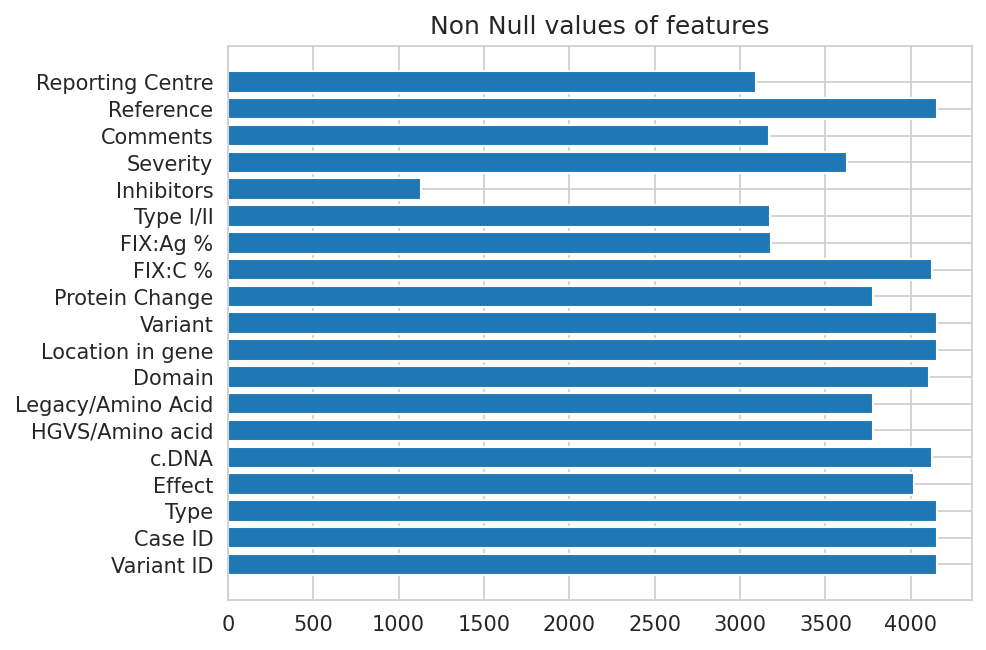

In [7]:
#Plot non-null values of each features using Horizontal Barplot
features, count = list(df.columns), list(df.notnull().sum())
plt.figure(dpi=150)
plt.barh(y=features, width=count)
plt.title("Non Null values of features")
plt.show()

Data Preprocessing

In [8]:
# Change all values to lowercase
df = df.applymap(lambda s : s.lower() if type(s) == str else s)

In [9]:
# Remove all the irrevalent columns
new_df = df.drop(columns=[i[0] for i in zip(df.columns, range(len(df))) if i[1] not in [3, 7, 8, 9, 10, 11, 12, 15]])

# Drop rows with null values
new_df = new_df.dropna()

In [10]:
# Drop ambiguious severity values
new_df = new_df[new_df.Severity.isin(['-']) == False]

In [11]:
# Drop "-" values from FIX:C% and FIX:Ag% 
new_df = new_df[(new_df['FIX:Ag %'] != '-') & (new_df['FIX:C %'] != '-')]

In [12]:
# Drop duplicate values
new_df = new_df.drop_duplicates()

In [13]:
#Correct values in FIX:C%
# max(FIX:C%) = 100%
# min(FIX:C%) = 0%
for index, row in new_df.iterrows(): #iternating over rows
    less_match = re.search(r'(?<=<)\d*\.*\d*', row['FIX:C %']) # searching for <100/<.34/<2.34 type values
    to_match = re.search(r'(\d*\.*\d*)\s*(to|-)\s*(\d*\.*\d*)', row['FIX:C %']) # searching for 10 to 5/10to14/10-15 type values 
    if less_match:
        new_df.at[index, 'FIX:C %'] = float(less_match[0])*rd.random() # converting to floating value in the range(0,less_match[0])
    if to_match:
        new_df.at[index, 'FIX:C %'] = rd.uniform(float(to_match[1]), float(to_match[3])) # converting to floating value in the range(less_match[0],less_match[1])


#Correct values in FIX:Ag%
# max(FIX:Ag%) = 200%
# min(FIX:Ag%) = 0%
for index, row in new_df.iterrows(): #iternating over rows
    less_match = re.search(r'(?<=<)\d*\.*\d*', row['FIX:Ag %']) # searching for <100/<.34/<2.34 type values
    to_match = re.search(r'(\d*\.*\d*)\s*(to|-)\s*(\d*\.*\d*)', row['FIX:Ag %']) # searching for 10 to 5/10to14/10-15 type values 
    grt_match = re.search(r'(?<=>)\d*\.*\d*', row['FIX:Ag %']) # Searcing for >100 values
    if less_match:
        new_df.at[index, 'FIX:Ag %'] = float(less_match[0])*rd.random() 
    if to_match:
        new_df.at[index, 'FIX:Ag %'] = rd.uniform(float(to_match[1]), float(to_match[3])) 
    if grt_match:
        new_df.at[index, 'FIX:Ag %'] = rd.uniform(float(grt_match[0]), 200) # converting to floating value in range(grt_match[0], 200)

In [14]:
# Convert values in FIX:C % and FIX:Ag % to float
new_df['FIX:C %'] = new_df['FIX:C %'].astype(float)
new_df['FIX:Ag %'] = new_df['FIX:Ag %'].astype(float)

In [15]:
#Write unique values and their count of each feature to a file
with open('unique_val_count.txt', 'w') as f:
    for col in new_df.columns:
        f.write(col+'\n')
        for i in zip(list(new_df[col].value_counts().index), list(new_df[col].value_counts().values)):
            f.write(str(i))
            f.write("\n")
        f.write("\n")
f.close()

In [16]:
#Separate "Variant" into 3 columns

#Initializing lists
act_nucleo = [] 
mut_nucleo = []
nucleo_pos = []

for index, row in new_df.iterrows(): # iterating over rows
    match = re.search(r'(\d+)(\w)>{1}(\w)', row['Variant']) # regex to extract actual, mutated nucleotide and mutation position
    if match:
        nucleo_pos.append(match[1]) # group 1: mutation position of nucleotide
        act_nucleo.append(match[2]) # group 2: actual nucleotide
        mut_nucleo.append(match[3]) # group 3: mutated nucleotide

# dropping existing Variant column
new_df = new_df.drop('Variant', axis=1) 

#Adding new Variant columns with its values
new_df['act_nucleo'] = act_nucleo 
new_df['nucleo_pos'] = nucleo_pos
new_df['mut_nucleo'] = mut_nucleo


In [17]:
#Separate "Protein change" into 3 columns
#Initializing lists
act_amino = [] 
mut_amino = []
amino_pos = []

for index, row in new_df.iterrows(): # iterating over rows
    match = re.search(r'([a-z]+)(\d+)([a-z]+|\*)', row['Protein Change']) # regex to extract actual, mutated nucleotide and mutation position
    if match:
        act_amino.append(match[1]) # group 1: mutation position of amino acid
        amino_pos.append(match[2]) # group 2: actual amino acid
        # group 3: mutated amino acide
        if match[3] == "*":
            mut_amino.append("stp_cdn")    
        else:
            mut_amino.append(match[3])  

# dropping existing Variant column
new_df = new_df.drop('Protein Change', axis=1) 

#Adding new Variant columns with its values
new_df['act_amino'] = act_amino 
new_df['amino_pos'] = amino_pos
new_df['mut_amino'] = mut_amino

In [18]:
# Move severity column to end
cols = list(new_df.columns)
cols.insert(len(cols), cols.pop(cols.index('Severity')))
new_df = new_df.loc[:, cols]

In [19]:
#Converting to int
cols = ['nucleo_pos', 'amino_pos']
for i in cols:
    new_df[i] = new_df[i].astype(int)

In [20]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 708 entries, 130 to 4149
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Effect            708 non-null    object 
 1   Domain            708 non-null    object 
 2   Location in gene  708 non-null    object 
 3   FIX:C %           708 non-null    float64
 4   FIX:Ag %          708 non-null    float64
 5   act_nucleo        708 non-null    object 
 6   nucleo_pos        708 non-null    int64  
 7   mut_nucleo        708 non-null    object 
 8   act_amino         708 non-null    object 
 9   amino_pos         708 non-null    int64  
 10  mut_amino         708 non-null    object 
 11  Severity          708 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 88.1+ KB


<Axes: xlabel='Effect', ylabel='count'>

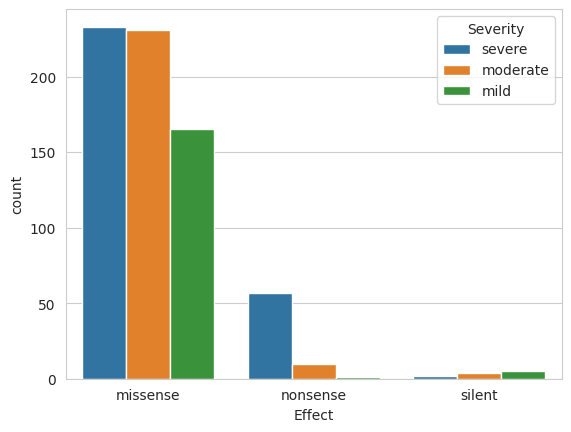

In [21]:
sns.countplot(data=new_df, x='Effect', hue='Severity')

<Axes: xlabel='Domain', ylabel='count'>

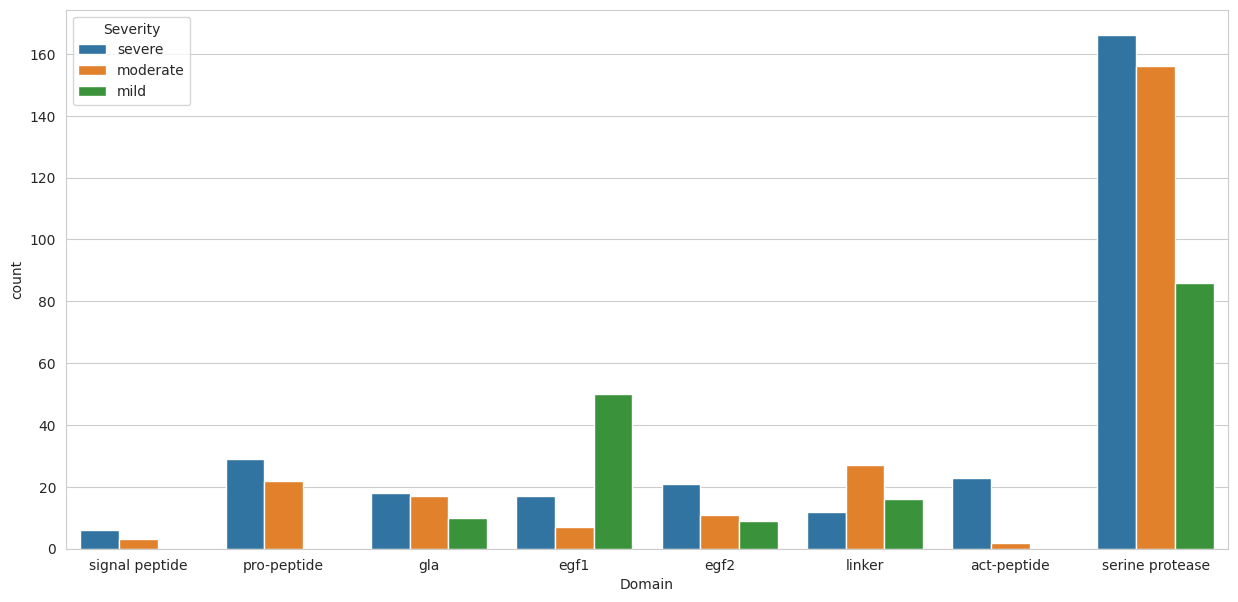

In [22]:
plt.figure(figsize=(15,7))
sns.countplot(data=new_df, x='Domain', hue='Severity')

<Axes: xlabel='Location in gene', ylabel='count'>

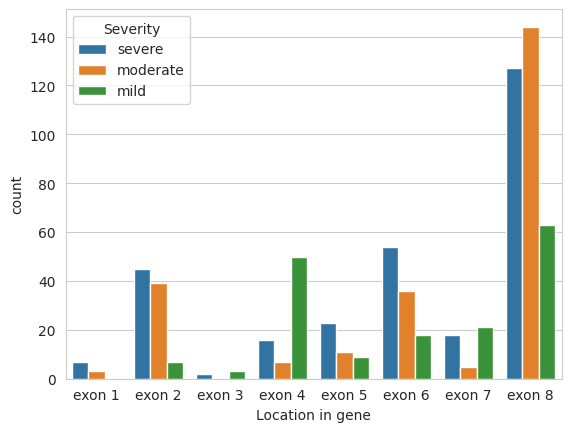

In [23]:
sns.countplot(data=new_df, x='Location in gene', hue='Severity')

In [24]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 708 entries, 130 to 4149
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Effect            708 non-null    object 
 1   Domain            708 non-null    object 
 2   Location in gene  708 non-null    object 
 3   FIX:C %           708 non-null    float64
 4   FIX:Ag %          708 non-null    float64
 5   act_nucleo        708 non-null    object 
 6   nucleo_pos        708 non-null    int64  
 7   mut_nucleo        708 non-null    object 
 8   act_amino         708 non-null    object 
 9   amino_pos         708 non-null    int64  
 10  mut_amino         708 non-null    object 
 11  Severity          708 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 88.1+ KB


<Axes: xlabel='Severity', ylabel='count'>

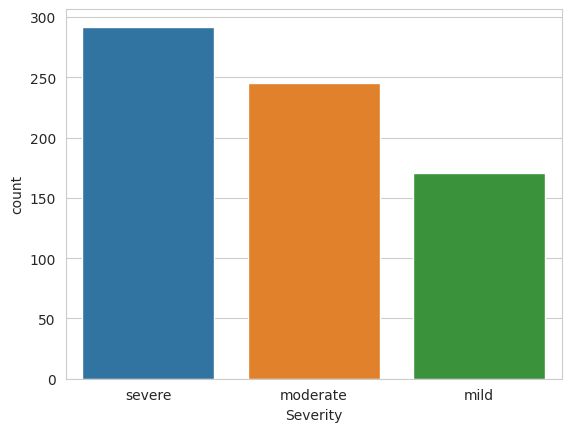

In [25]:
sns.countplot(data=new_df, x='Severity')

<Axes: xlabel='mut_nucleo', ylabel='count'>

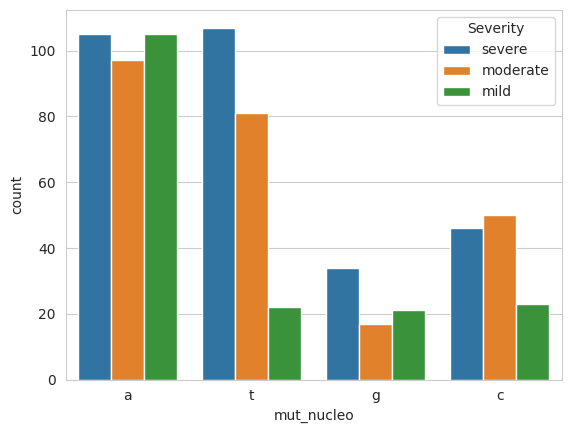

In [26]:
sns.countplot(data=new_df, x='mut_nucleo', hue='Severity')

<Axes: xlabel='mut_amino', ylabel='count'>

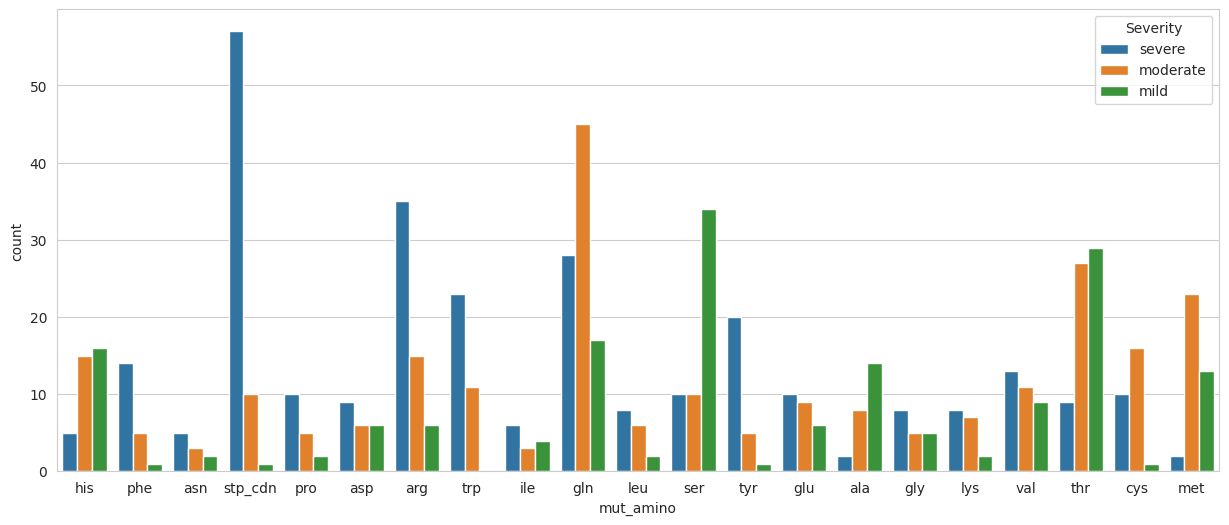

In [27]:
plt.figure(figsize=(15,6))
sns.countplot(data=new_df, x='mut_amino', hue='Severity')

Data Visualization

<Figure size 1000x1000 with 0 Axes>

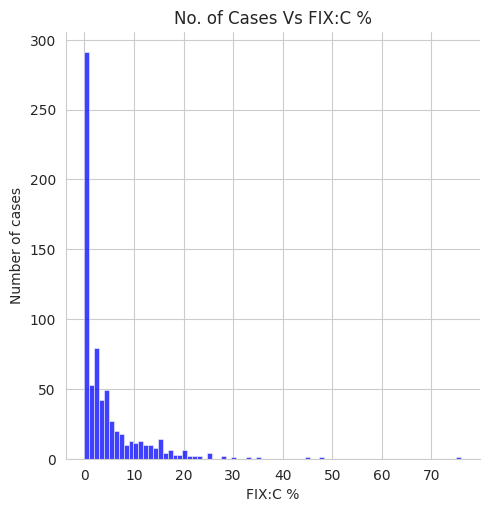

In [28]:
#No.of cases vs FIX: C% 
plt.figure(figsize=(10, 10))
sns.displot(new_df['FIX:C %'], color='b')
plt.title('No. of Cases Vs FIX:C %')
plt.ylabel('Number of cases')
plt.show()

<Figure size 1000x1000 with 0 Axes>

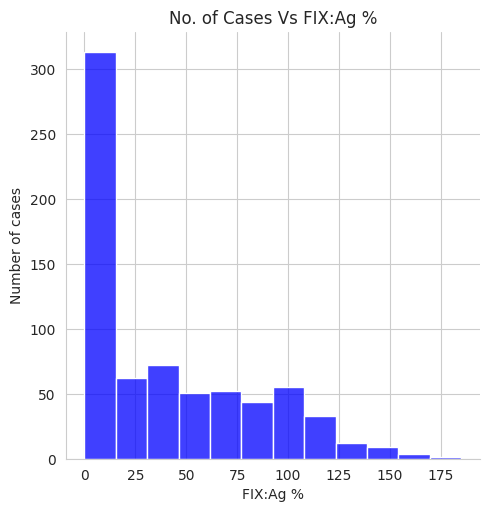

In [29]:
#No.of cases vs FIX: Ag% 
plt.figure(figsize=(10, 10))
sns.displot(new_df['FIX:Ag %'], color='b')
plt.title('No. of Cases Vs FIX:Ag %')
plt.ylabel('Number of cases')
plt.show()

In [30]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 708 entries, 130 to 4149
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Effect            708 non-null    object 
 1   Domain            708 non-null    object 
 2   Location in gene  708 non-null    object 
 3   FIX:C %           708 non-null    float64
 4   FIX:Ag %          708 non-null    float64
 5   act_nucleo        708 non-null    object 
 6   nucleo_pos        708 non-null    int64  
 7   mut_nucleo        708 non-null    object 
 8   act_amino         708 non-null    object 
 9   amino_pos         708 non-null    int64  
 10  mut_amino         708 non-null    object 
 11  Severity          708 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 88.1+ KB


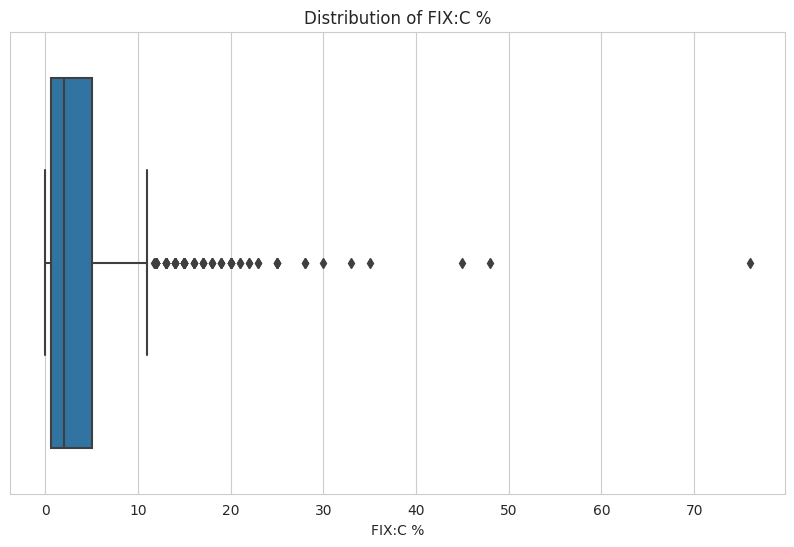

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(x=new_df['FIX:C %'])
plt.title('Distribution of FIX:C %')
plt.show()

In [32]:
Q1 = new_df['FIX:C %'].quantile(0.25)
Q3 = new_df['FIX:C %'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

4.424056481236977


In [33]:
new_df[(new_df['FIX:C %'] < Q1 - 1.5*IQR) | (new_df['FIX:C %'] > Q3 + 1.5*IQR)]

,Effect,Domain,Location in gene,FIX:C %,FIX:Ag %,act_nucleo,nucleo_pos,mut_nucleo,act_amino,amino_pos,mut_amino,Severity
472,missense,gla,exon 2,15.0,68.0,t,163,a,phe,55,ile,mild
483,missense,gla,exon 2,14.0,118.0,t,163,a,phe,55,ile,mild
494,missense,gla,exon 2,13.0,44.0,g,172,a,gly,58,arg,mild
704,missense,gla,exon 2,20.0,70.0,g,224,a,arg,75,gln,mild
706,missense,gla,exon 2,18.0,51.0,g,224,a,arg,75,gln,mild
...,...,...,...,...,...,...,...,...,...,...,...,...
4106,missense,serine protease,exon 8,25.0,132.0,g,1346,a,arg,449,gln,mild
4108,missense,serine protease,exon 8,33.0,101.0,g,1346,a,arg,449,gln,mild
4109,missense,serine protease,exon 8,30.0,60.0,g,1346,a,arg,449,gln,mild
4111,missense,serine protease,exon 8,48.0,185.0,g,1346,a,arg,449,gln,mild


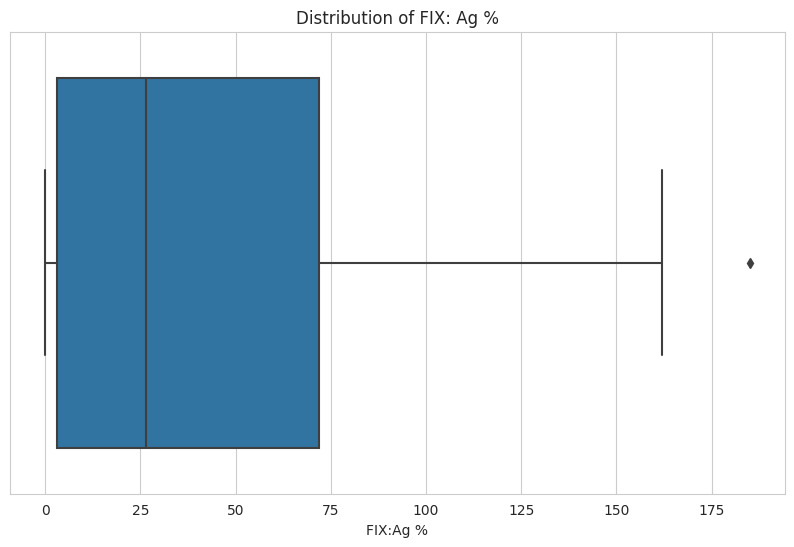

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(x=new_df['FIX:Ag %'])
plt.title('Distribution of FIX: Ag %')
plt.show()

In [35]:
Q1 = new_df['FIX:Ag %'].quantile(.25)
Q3 = new_df['FIX:Ag %'].quantile(.75)
IQR = Q3 - Q1

In [36]:
new_df[(new_df['FIX:Ag %'] < Q1 - 1.5*IQR) | (new_df['FIX:Ag %'] > Q3 + 1.5*IQR)]

,Effect,Domain,Location in gene,FIX:C %,FIX:Ag %,act_nucleo,nucleo_pos,mut_nucleo,act_amino,amino_pos,mut_amino,Severity
4111,missense,serine protease,exon 8,48.0,185.0,g,1346,a,arg,449,gln,mild


In [37]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 708 entries, 130 to 4149
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Effect            708 non-null    object 
 1   Domain            708 non-null    object 
 2   Location in gene  708 non-null    object 
 3   FIX:C %           708 non-null    float64
 4   FIX:Ag %          708 non-null    float64
 5   act_nucleo        708 non-null    object 
 6   nucleo_pos        708 non-null    int64  
 7   mut_nucleo        708 non-null    object 
 8   act_amino         708 non-null    object 
 9   amino_pos         708 non-null    int64  
 10  mut_amino         708 non-null    object 
 11  Severity          708 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 88.1+ KB


In [38]:
n_df = new_df.iloc[:, :-1]
t_df = new_df.iloc[:, -1]

In [39]:


# Label Encode severity
lb = LabelEncoder()
t_df = lb.fit_transform(t_df)

# Feature transformation
categorial_cols = [i for i in n_df.columns if n_df.dtypes[i] in ['O']]
numerical_cols = [i for i in n_df.columns if n_df.dtypes[i] in ['float64', 'int64']]

feature_cols = categorial_cols + numerical_cols

transformer = [
    ('encode', OrdinalEncoder(), categorial_cols),
    ('scale', StandardScaler(), numerical_cols)
]

colTrans = ColumnTransformer(transformer, remainder='passthrough')
n_df_raw = colTrans.fit_transform(n_df)

n_df = pd.DataFrame(
    n_df_raw, columns=colTrans.get_feature_names_out())


In [40]:
# Adding severity
n_df['Severity'] = t_df

<Axes: >

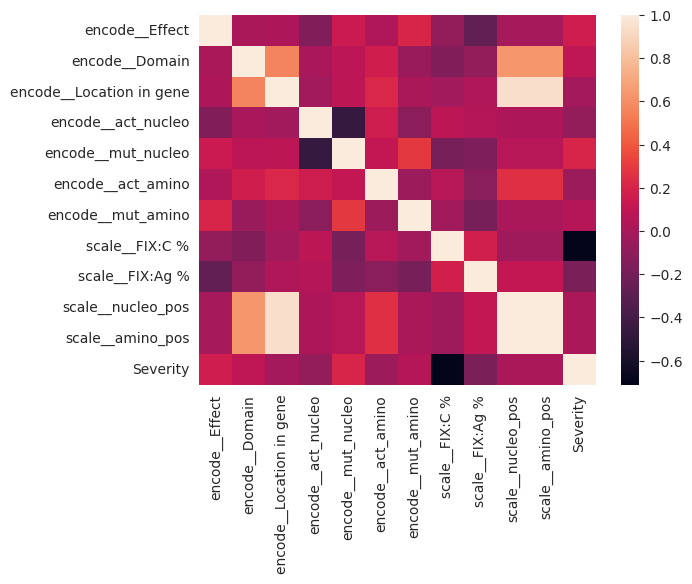

In [41]:
sns.heatmap(n_df.corr())

Model Training

In [43]:
# Split data into target and features
x = n_df.iloc[:, :-1]
y = n_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=42)

# correcting imbalance dataset
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [44]:
#object creation
nb_classifier = GNB()
log_reg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(n_estimators=100)
gb = GradientBoostingClassifier(random_state=42)

In [45]:
#Training
log_reg.fit(X_train, y_train)
nb_classifier.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [46]:
# Calculate the accuracy
print(f"Logistic regression: {accuracy_score(y_test, log_reg.predict(X_test))}")
print(f"Naive Bayes: {accuracy_score(y_test, nb_classifier.predict(X_test))}")
print(f"Random Forest: {accuracy_score(y_test, rf.predict(X_test))}")
print(f"Gradient boosting: {accuracy_score(y_test, gb.predict(X_test))}")

Logistic regression: 0.9096045197740112
Naive Bayes: 0.9152542372881356
Random Forest: 0.9943502824858758
Gradient boosting: 1.0


In [47]:
n_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   encode__Effect            708 non-null    float64
 1   encode__Domain            708 non-null    float64
 2   encode__Location in gene  708 non-null    float64
 3   encode__act_nucleo        708 non-null    float64
 4   encode__mut_nucleo        708 non-null    float64
 5   encode__act_amino         708 non-null    float64
 6   encode__mut_amino         708 non-null    float64
 7   scale__FIX:C %            708 non-null    float64
 8   scale__FIX:Ag %           708 non-null    float64
 9   scale__nucleo_pos         708 non-null    float64
 10  scale__amino_pos          708 non-null    float64
 11  Severity                  708 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 66.5 KB


In [48]:
joblib.dump(gb, 'gradient_model.joblib')
joblib.dump(colTrans, 'colTrans.joblib')
joblib.dump(lb, 'labelEncoder.joblib')

['labelEncoder.joblib']

In [49]:
user_input = [['silent', 'linker', 'exon 3', 'c', 'g', 'leu', 'arg', 1.5, 90, 328, 355]]
user_df = pd.DataFrame(user_input, columns=feature_cols)
user_df = colTrans.transform(user_df)
print(lb.inverse_transform(gb.predict(user_df)))

['moderate']
